In [1]:
import opt_mo
import axelrod as axl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import sympy as sym

In [4]:
import itertools

In [6]:
solutions = []
for i in range(10):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    solution_set = opt_mo.reactive_set(opponents)
    solutions.append(opt_mo.argmax(opponents, solution_set))

In [7]:
solutions

[(0, 1, 2.9121595908840052),
 (0, 1, 0.0018769213594600986),
 (0, -3.807259673168753, 4.807259653397845),
 (0, 1, 2.412770479198924),
 (0, 1, 3.3143047132919743),
 (0, 1, 3.0616567017643717),
 ((0.9886231193895081+0j), 1, (2.6537306960560634+0j)),
 ((0.995203315102194+0j), 0, (2.299853415429977+0j)),
 (0, 1, 4.712946385000486),
 (0, 0.060016226146695294, 1.8617225346224662)]

**Visualise**

In [8]:
import matplotlib.pyplot as plt

% matplotlib inline

In [13]:
def plot_argmax(opponents, solution):
    p_1, p_2 = sym.symbols('p_1, p_2')
    p = (p_1, p_2, p_1, p_2)
    
    p_one, p_two = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
    utility = -opt_mo.tournament_utility(p, opponents)
    
    expr = sym.lambdify((p_1, p_2), utility.simplify())
    
    plt.figure()
    X, Y = np.meshgrid(p_one, p_two)
    Z = expr(X, Y)
    
    plt.contourf(X, Y, Z);
    plt.colorbar();
    plt.plot(solution[0], solution[1], marker='o', color='r')
    plt.show();

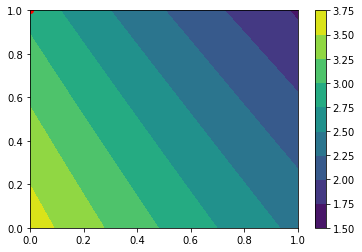

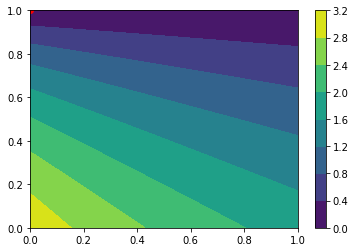

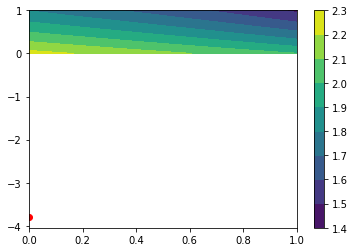

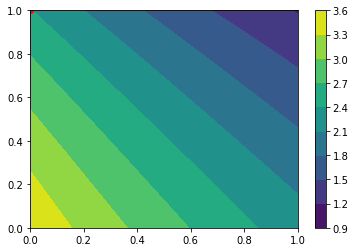

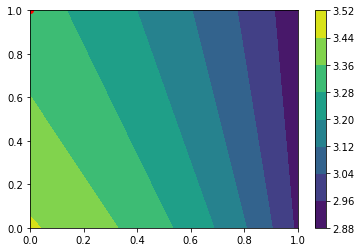

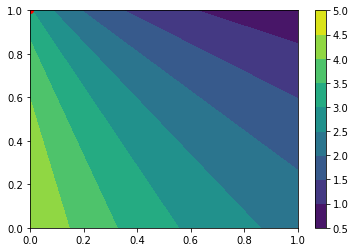

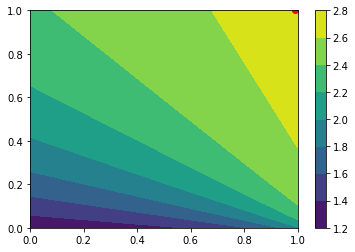

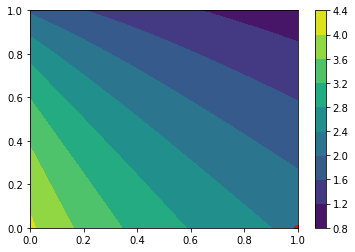

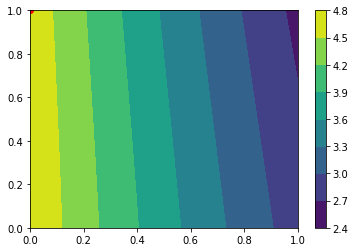

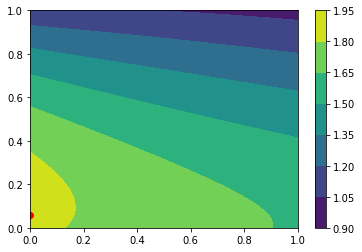

In [14]:
for i in range(10):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    plot_argmax(opponents, solutions[i])